# Data Preparation

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("..\\data\\Mined_Buhari_Tweets.csv")
data.head()

,Unnamed: 0,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,source_device,retweet_text,quote_text,quote_screen_name
0,0,1191387612969353216,Muhammadu Buhari,MBuhari,184,Today marks a new and beneficial relationship ...,2019-11-06 01:03:44.991462,2019-11-04 16:11:56.000000,694,[],4045,NaN,Twitter for iPhone,None,None,None
1,1,1191387542047907842,Muhammadu Buhari,MBuhari,189,Today this changes. For the first time under o...,2019-11-06 01:03:44.991462,2019-11-04 16:11:39.000000,648,[],4045,NaN,Twitter for iPhone,None,None,None
2,2,1191387184106016768,Muhammadu Buhari,MBuhari,140,All attempts to amend the law on the distribut...,2019-11-06 01:03:44.991462,2019-11-04 16:10:14.000000,428,[],4045,NaN,Twitter for iPhone,None,None,None
3,3,1191386748615634944,Muhammadu Buhari,MBuhari,203,"Nigeria will now receive its fair, rightful an...",2019-11-06 01:03:44.991462,2019-11-04 16:08:30.000000,563,[],4045,NaN,Twitter for iPhone,None,None,None
4,4,1191383289975758849,Muhammadu Buhari,MBuhari,189,"Now, a month later, we have together with the ...",2019-11-06 01:03:44.991462,2019-11-04 15:54:45.000000,708,[],4045,NaN,Twitter for iPhone,None,None,None


In [4]:
data.columns

Index(['Unnamed: 0', 'tweet_id', 'name', 'screen_name', 'retweet_count',
       'text', 'mined_at', 'created_at', 'favourite_count', 'hashtags',
       'status_count', 'location', 'source_device', 'retweet_text',
       'quote_text', 'quote_screen_name'],
      dtype='object')

In [5]:
data.status_count.unique()

array([4045], dtype=int64)

In [6]:
data.source_device.unique()

array(['Twitter for iPhone', 'Twitter Media Studio', 'WriteRack',
       'Twitter Web Client', 'Twitter for iPad', 'Twitter for BlackBerry',
       'Thunderclap', 'Twitter for Android Tablets'], dtype=object)

Might be interesting to see how content has been created using the different devices. Are there multiple handlers for the account?

In [7]:
data.quote_text.unique()

array(['None'], dtype=object)

In [8]:
data.quote_screen_name.nunique()

1

In [9]:
data.hashtags.unique()[3]

"[{'text': 'FIFAU17WC', 'indices': [268, 278]}]"

Let's investigate these hashtags

In [10]:
from ast import literal_eval

data.hashtags = data.hashtags.apply(lambda x: literal_eval(x))

#Custom func that retrieves the hashtag from the dictionary
def hashtag_remover(hash_series):
    for i, row in enumerate(hash_series):
        if len(row) == 0:
            return ""
        else:
            return row['text']

data.hashtags = data.hashtags.apply(hashtag_remover)

In [11]:
data.hashtags.nunique()

141

So MBuhari has 141 hashtags in 597 tweets.

In [12]:
data.drop(["Unnamed: 0", "tweet_id", "name", "screen_name","mined_at", "location", "status_count", "quote_text", "quote_screen_name"], axis=1, inplace=True)

In [13]:
data.head()

,retweet_count,text,created_at,favourite_count,hashtags,source_device,retweet_text
0,184,Today marks a new and beneficial relationship ...,2019-11-04 16:11:56.000000,694,None,Twitter for iPhone,None
1,189,Today this changes. For the first time under o...,2019-11-04 16:11:39.000000,648,None,Twitter for iPhone,None
2,140,All attempts to amend the law on the distribut...,2019-11-04 16:10:14.000000,428,None,Twitter for iPhone,None
3,203,"Nigeria will now receive its fair, rightful an...",2019-11-04 16:08:30.000000,563,None,Twitter for iPhone,None
4,189,"Now, a month later, we have together with the ...",2019-11-04 15:54:45.000000,708,None,Twitter for iPhone,None


In [14]:
data.loc[data.text.str.startswith('RT'), 'text'] = data.loc[data.text.str.startswith('RT'), 'retweet_text'] #Replaces truncated RT tweets with the full_text from retweet_text

In [15]:
data.text.str.startswith("RT").sum()

0

In [16]:
data.loc[data.text.str.contains("RT")].text.to_dict()

{263: 'FURTHER UPDATES: \n\n1/ Minister of Foreign Affairs @GeoffreyOnyeama has summoned the SA High Commissioner to Nigeria.\n\n2/ Next month President Buhari will Visit South Africa and meet with Pres @CyrilRamaphosa. Top on Agenda will be guaranteeing safety of ALL Nigerians in SA. https://t.co/RMoFkm0Bqz',
 1059: 'A Police Special investigation Team, comprising the Intelligence Response Team (IRT), Special Tactical Squad (STS) and Tactical Intelligence Unit (TIU), led by Commissioner of Police, IGP Monitoring Unit, have already been deployed to Plateau State &amp; have commenced investigation.',
 1270: 'The President believes that the Economic and security implications of Nigeria signing the #AfCFTA Agreement need to be FURTHER discussed. This is a far-reaching decision that requires the widest possible consultations amongst all stakeholders.',
 1408: 'PRESIDENT ORDERS IGP TO MOVE TO BENUE STATE TO RESTORE LAW AND ORDER AND PREVENT FURTHER LOSS OF LIVES AND ATTACKS IN GUMA AND LOGO

So it looks like we don't have any more RT tags and there is no need to write a regex to remove it. 

In [17]:
data.loc[data.text.str.contains("&amp")].text.sample(n=5).to_dict() #to check for &amp tags

{1787: "Today's ratification of Agreements is an important step, in line with the delivery of our Anti-Corruption &amp; Economic Diversification Vision https://t.co/EORVGTGasf",
 677: 'We must not allow the enemies of the region to succeed in their quest to destabilize the area. We must reinvigorate our collective will &amp; commitment towards eradicating terrorism from our region. We must &amp; will remain focused and true to ensuring sustainable peace and development',
 1987: 'I congratulate Chief Adebisi Akande, elder statesman &amp; founding Interim Chairman of our All Progressives Congress,on his 78th birthday today https://t.co/n3iEiVJ5SO',
 1880: "We've reached out to the captors &amp; are negotiating to ensure the girls' safe release. We're willing to bend over backwards to achieve this.",
 3040: 'Join us as we head to the polls.\nhttps://t.co/YVEoAQSB4I"ref"%3A98%7D&amp;aref=98&amp;ref=bookmark\n#GMB15'}

In [18]:
from appos import appos 
# discovered it online also! exciting. 

# custom function that expands contractions such as "I'm"
def expander(x):
    reformed = x.lower().split()
    reformed = [appos[word] if word in appos else word for word in reformed]
    reformed = " ".join(reformed)
    return reformed 

data.text = data.text.apply(lambda x: expander(x))

In [19]:
#to make it easy to see 
#sample to randomise selection so that we can monitor changes we make w/o loading the entire Series
data.text.sample(n=5).to_dict()  

{833: 'nigeria continues to call on the israelis and the palestinians to make the necessary compromises in the interest of justice, peace and security, in line with our numerous un resolutions and applicable international laws.',
 1682: 'state house press release: pres @mbuhari thanks jordan for donation of military hardware in support of fight against terrorism #ngainunga https://t.co/ljmc5tswhc',
 364: 'https://t.co/uhvqgnkzyb',
 865: 'hon. amaechi was the director general of the buhari-osinbajo presidential campaign committee in 2014-2015 that won the elections and brought the current administration into office.',
 1312: 'this morning at the state house, president @mbuhari will preside over a meeting on the presidential fertilizer initiative (pfi). meeting will bring together government officials and the private sector (investors, senior execs of fertilizer companies and financial institutions).'}

After running this multiple times, it's clear we need to deal with:
* URLS
* username-tags
* html tags 
* punctuation
* Named Entities

In [20]:
import re
import string

In [21]:
#Custom function to lower case of text and clean some entities
def clean_text(x):
    x = x.lower()
    x = re.sub("&amp", '', x) #replace &amp tags
    x = re.sub(r'@[A-Z0-9a-z_:]+', '', x) # replaces username-tags
    x = re.sub('https?://[A-Za-z0-9./]+', '', x) #replaces URLs
    x = re.sub("[^a-zA-Z]", " ", x) #replaces hashtags
    x = re.sub("\n", "", x)
    x = re.sub("{}".format(re.escape(string.punctuation)), "", x)
    return x

In [22]:
data.text = data.text.apply(lambda x: clean_text(x))

In [23]:
data.text.sample(n=5).to_dict()  #random samples to help us check our cleaned text

{463: 'i mourn the passing of ambassador abiodun bashua and professor pius adesanmi in the ethiopian airlines plane crash which occurred yesterday  distinguished nigerians who did the nation proud in their professional endeavors ',
 2006: 'i asked sp  to kindly represent me at the armed forces remembrance day jummat prayers  this afternoon at the national mosque',
 2304: 'presidents of benin  chad  niger joined me at today s book launch  our regional partnership is one i value very much ',
 404: 'i also recognize that we have a responsibility to improve the welfare of our police officers  as they daily put their lives on the line in order that the rest of us may freely go about our business in safety  police welfare remains one of the priorities of our administration ',
 1231: 'i had a very productive meeting with president trump today at the white house  key issues discussed  security  anti corruption  trade  human rights  humanitarian read my speeches here  during working lunch  duri

In [24]:
data.created_at = pd.to_datetime(data.created_at)
data['year'], data['month'] = data.created_at.dt.year, data.created_at.dt.month

data.set_index('created_at', inplace=True) #make the timestamp the index of the dataframe
data.sort_index(inplace=True)

## Data Analysis 

In [25]:
from nltk.tokenize import word_tokenize 

data['tokens'] = data.text.apply(lambda x: word_tokenize(x))

In [26]:
data.head()

,retweet_count,text,favourite_count,hashtags,source_device,retweet_text,year,month,tokens
created_at,,,,,,,,,
2015-02-08 19:05:18,583,my friends i know many of you have waited for...,56,None,Twitter Web Client,None,2015,2,"[my, friends, i, know, many, of, you, have, wa..."
2015-02-08 19:06:04,837,to be clear the postponement is a fraudulent ...,83,None,Twitter Web Client,None,2015,2,"[to, be, clear, the, postponement, is, a, frau..."
2015-02-08 19:06:33,640,as a nigerian and a candidate in the elections...,62,None,Twitter Web Client,None,2015,2,"[as, a, nigerian, and, a, candidate, in, the, ..."
2015-02-08 19:06:53,751,but we must remain calm and peaceful while re...,80,None,Twitter Web Client,None,2015,2,"[but, we, must, remain, calm, and, peaceful, w..."
2015-02-08 19:07:47,778,our country is going through difficult times i...,79,None,Twitter Web Client,None,2015,2,"[our, country, is, going, through, difficult, ..."


## Analysis of Word Use

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

### 1. Without removing stopwords

[('the', 5342), ('to', 3057), ('of', 3032), ('and', 2592), ('in', 1754), ('i', 1231), ('we', 1139), ('a', 1091), ('for', 1002), ('our', 965), ('is', 847), ('will', 788), ('that', 777), ('on', 701), ('nigeria', 679), ('with', 614), ('this', 595), ('are', 535), ('as', 516), ('have', 511), ('all', 508), ('be', 441), ('by', 411), ('president', 403), ('s', 392), ('state', 369), ('at', 356), ('today', 349), ('you', 348), ('not', 347), ('it', 324), ('from', 318), ('their', 297), ('my', 293), ('has', 271), ('nigerians', 239), ('also', 237), ('gmb', 227), ('security', 227), ('campaigntrail', 225), ('people', 223), ('government', 209), ('who', 198), ('us', 193), ('his', 185), ('can', 176), ('me', 174), ('was', 173), ('continue', 170), ('country', 168)]


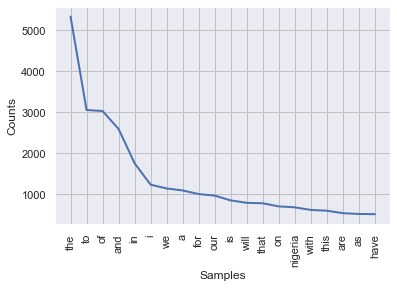

In [28]:
x = []

for token in data.tokens:
    x += token
    
from nltk.probability import FreqDist
freq_distr = FreqDist(x)

print(freq_distr.most_common(50))

freq_distr.plot(20, cumulative=False)

### 2. Removing stop words

In [29]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
swBuhari = ["nigeria", "country", "state", "nigerians", "gmb", "president", 
            "pres", "nigerian", "buhari", "today", "also", "government"]

stop_words.update(swBuhari)

#map lists in each row to a new list where stop_words have been removed using list comprehension
data['tokens_wo_sw'] = data.tokens.apply(lambda x: 
                                         [word for word in x if word.lower() not in stop_words])

[('security', 227), ('campaigntrail', 225), ('people', 223), ('us', 193), ('continue', 170), ('change', 155), ('must', 153), ('national', 146), ('one', 139), ('work', 131), ('support', 128), ('new', 128), ('ensure', 127), ('peace', 114), ('meeting', 114), ('let', 113), ('corruption', 109), ('economic', 108), ('years', 106), ('time', 105), ('abuja', 104), ('power', 102), ('thank', 99), ('world', 98), ('administration', 98), ('federal', 97), ('year', 96), ('infrastructure', 95), ('days', 90), ('africa', 90), ('apc', 87), ('efforts', 85), ('states', 85), ('may', 85), ('nation', 84), ('house', 84), ('party', 84), ('day', 82), ('make', 80), ('development', 80), ('god', 78), ('kaduna', 76), ('economy', 74), ('across', 73), ('general', 73), ('presidential', 72), ('commitment', 72), ('many', 71), ('take', 71), ('projects', 71)]


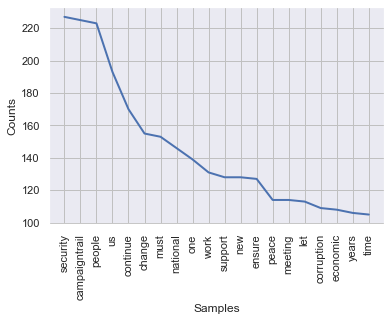

In [30]:
y = []

for token in data.tokens_wo_sw:
    y += token
    
from nltk.probability import FreqDist
freq_distrib = FreqDist(y)

print(freq_distrib.most_common(50))

freq_distrib.plot(20, cumulative=False)

## Word Use by Device

In [31]:
def pop_words_by_device(data, device,  remove_stopwords=True, 
                        most_common_show=10, most_common_plot=15, 
                        cumulative=False):
    """
    This func checks the specified number of most 
    common words 
    when particular devices are used to tweet
    
    Parameters:
    -----------
    * data - the dataframe to be used. text 
    should have been cleaned/processed
    * device - the device to be checked against. 
    Must be str
    * cumulative - defaults to False. If True, Freq 
    Dist plot of common words uses cumulative freq
    
    Returns:
    --------
    A list of most common words & a plot of their frequencies. 
    """
    
    temp = data.loc[data.source_device == device]
    print("{}: {} tweets\n".format(device, temp.shape[0]))
    print("This device tweeted {:02f}% of all Buhari's tweets".format(
                                    100 * len(temp) / len(data) ), "\n")
    print("Min date: {}".format(temp.index.min()))
    print("Max date: {}".format(temp.index.max()), "\n")
    
        
    y = []
    
    if remove_stopwords:
        for token in temp.tokens_wo_sw:
            y += token
    else:
        for token in temp.tokens:
            y += token
        
    freq_distrib = FreqDist(y)

    print(freq_distrib.most_common(most_common_show))

    freq_distrib.plot(most_common_plot, cumulative=False)
    print("\n")

Twitter Web Client: 522 tweets

This device tweeted 16.086287% of all Buhari's tweets 

Min date: 2015-02-08 19:05:18
Max date: 2017-03-13 13:21:02 

[('campaigntrail', 120), ('change', 66), ('days', 40), ('tellyourneighbour', 39), ('march', 36), ('iwillvoteapc', 28), ('abuja', 26), ('socialmedia', 24), ('apc', 23), ('security', 22)]


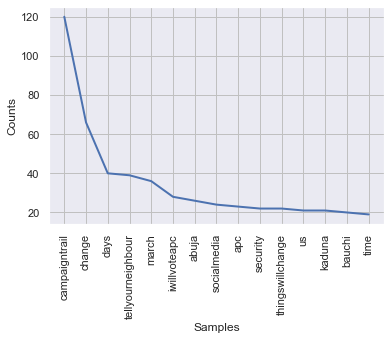



Twitter for BlackBerry: 140 tweets

This device tweeted 4.314330% of all Buhari's tweets 

Min date: 2015-02-09 09:37:48
Max date: 2015-08-04 14:42:51 

[('campaigntrail', 74), ('gmbchatamhouse', 26), ('change', 21), ('women', 16), ('iwillvoteapc', 14), ('londonsayssaibuhari', 14), ('days', 13), ('march', 11), ('thingswillchange', 11), ('socialmedia', 10)]


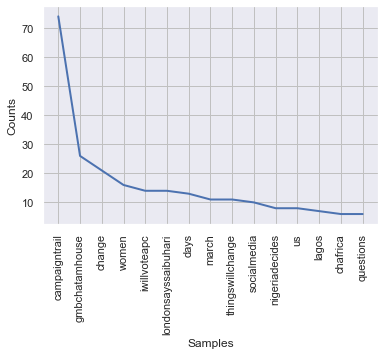



Twitter for Android Tablets: 81 tweets

This device tweeted 2.496148% of all Buhari's tweets 

Min date: 2015-02-28 19:38:32
Max date: 2015-03-25 18:21:14 

[('campaigntrail', 31), ('bauchi', 22), ('tellyourneighbour', 16), ('change', 14), ('owerri', 11), ('iwillvoteapc', 9), ('days', 8), ('march', 8), ('socialmedia', 7), ('crowd', 7)]


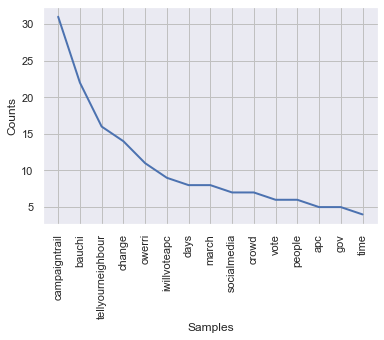



Thunderclap: 1 tweets

This device tweeted 0.030817% of all Buhari's tweets 

Min date: 2015-03-26 20:31:37
Max date: 2015-03-26 20:31:37 

[('nigeriadecides', 1), ('iwillvoteapc', 1), ('positive', 1), ('change', 1), ('read', 1)]


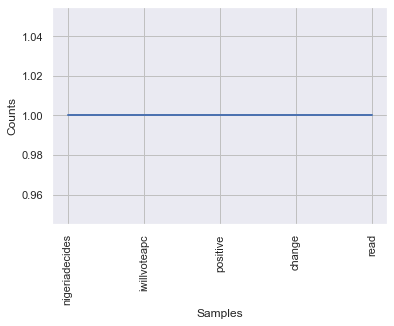



WriteRack: 103 tweets

This device tweeted 3.174114% of all Buhari's tweets 

Min date: 2015-03-26 22:03:48
Max date: 2017-08-21 06:07:09 

[('us', 9), ('time', 9), ('shall', 8), ('change', 7), ('let', 6), ('god', 6), ('campaign', 5), ('want', 5), ('building', 5), ('creating', 5)]


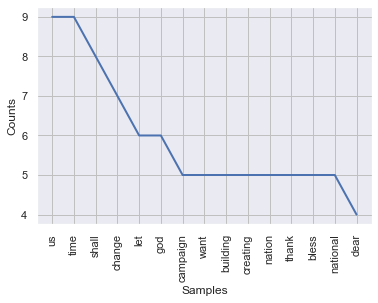



Twitter for iPad: 22 tweets

This device tweeted 0.677966% of all Buhari's tweets 

Min date: 2015-05-31 21:39:42
Max date: 2016-09-20 22:17:59 

[('fight', 5), ('pacacjudges', 5), ('corruption', 4), ('mallam', 3), ('support', 3), ('mr', 2), ('femi', 2), ('adesina', 2), ('garba', 2), ('shehu', 2)]


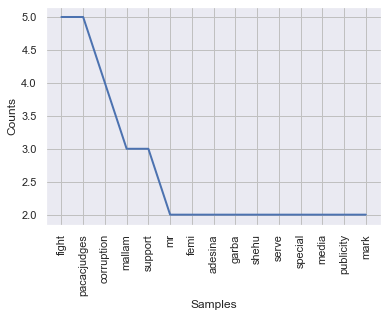



Twitter for iPhone: 2369 tweets

This device tweeted 73.004622% of all Buhari's tweets 

Min date: 2016-06-14 07:00:28
Max date: 2019-11-04 16:11:56 

[('security', 198), ('people', 192), ('continue', 156), ('us', 149), ('must', 138), ('national', 132), ('one', 123), ('work', 118), ('ensure', 118), ('new', 115)]


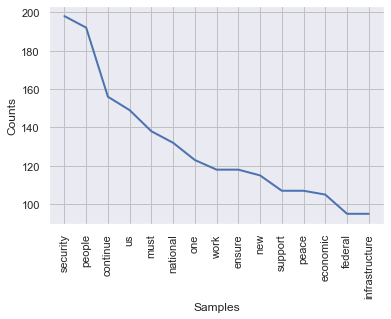



Twitter Media Studio: 7 tweets

This device tweeted 0.215716% of all Buhari's tweets 

Min date: 2016-10-10 18:01:24
Max date: 2019-03-06 16:13:53 

[('nes', 2), ('economy', 2), ('made', 2), ('agriculture', 2), ('young', 2), ('people', 2), ('declared', 1), ('open', 1), ('morning', 1), ('address', 1)]


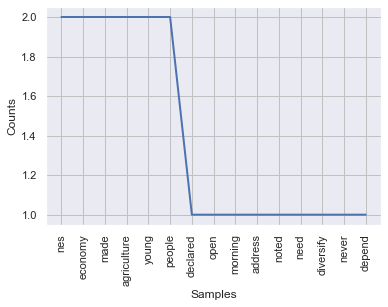

In [32]:
for device in data.source_device.unique():
    pop_words_by_device(data, device)

## Sentiment Analysis

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
analyzer = SIA()

def sentiment_analyzer(data, column, analyzer):
    sentiment_ = data[str(column)].apply(lambda x: analyzer.polarity_scores(x))
    data = pd.concat([data, sentiment_.apply(pd.Series)], 1)
    return data

In [34]:
data = sentiment_analyzer(data, 'text', analyzer)
data.head()

,retweet_count,text,favourite_count,hashtags,source_device,retweet_text,year,month,tokens,tokens_wo_sw,neg,neu,pos,compound
created_at,,,,,,,,,,,,,,
2015-02-08 19:05:18,583,my friends i know many of you have waited for...,56,None,Twitter Web Client,None,2015,2,"[my, friends, i, know, many, of, you, have, wa...","[friends, know, many, waited, speak, postponem...",0.000,0.853,0.147,0.4767
2015-02-08 19:06:04,837,to be clear the postponement is a fraudulent ...,83,None,Twitter Web Client,None,2015,2,"[to, be, clear, the, postponement, is, a, frau...","[clear, postponement, fraudulent, attempt, sub...",0.134,0.627,0.239,0.3664
2015-02-08 19:06:33,640,as a nigerian and a candidate in the elections...,62,None,Twitter Web Client,None,2015,2,"[as, a, nigerian, and, a, candidate, in, the, ...","[candidate, elections, share, disappointment, ...",0.296,0.602,0.102,-0.6369
2015-02-08 19:06:53,751,but we must remain calm and peaceful while re...,80,None,Twitter Web Client,None,2015,2,"[but, we, must, remain, calm, and, peaceful, w...","[must, remain, calm, peaceful, resolute, allow...",0.310,0.392,0.298,-0.1025
2015-02-08 19:07:47,778,our country is going through difficult times i...,79,None,Twitter Web Client,None,2015,2,"[our, country, is, going, through, difficult, ...","[going, difficult, times, hands, terrorists, a...",0.341,0.541,0.118,-0.8402


In [35]:
data[['neg', 'neu', 'pos', 'compound']].describe()

,neg,neu,pos,compound
count,3245.000000,3245.000000,3245.000000,3245.000000
mean,0.046473,0.796907,0.148598,0.291418
std,0.083405,0.161681,0.133134,0.473833
min,0.000000,0.000000,0.000000,-0.974400
25%,0.000000,0.698000,0.000000,0.000000
50%,0.000000,0.805000,0.136000,0.361200
75%,0.073000,0.917000,0.231000,0.709600
max,0.548000,1.000000,0.778000,0.984300


In [36]:
data['mean_sentiment'] = data['compound'].expanding().mean()

In [37]:
data['rolling_sentiment'] = data['compound'].rolling('90D').mean()
data.head()

,retweet_count,text,favourite_count,hashtags,source_device,retweet_text,year,month,tokens,tokens_wo_sw,neg,neu,pos,compound,mean_sentiment,rolling_sentiment
created_at,,,,,,,,,,,,,,,,
2015-02-08 19:05:18,583,my friends i know many of you have waited for...,56,None,Twitter Web Client,None,2015,2,"[my, friends, i, know, many, of, you, have, wa...","[friends, know, many, waited, speak, postponem...",0.000,0.853,0.147,0.4767,0.476700,0.476700
2015-02-08 19:06:04,837,to be clear the postponement is a fraudulent ...,83,None,Twitter Web Client,None,2015,2,"[to, be, clear, the, postponement, is, a, frau...","[clear, postponement, fraudulent, attempt, sub...",0.134,0.627,0.239,0.3664,0.421550,0.421550
2015-02-08 19:06:33,640,as a nigerian and a candidate in the elections...,62,None,Twitter Web Client,None,2015,2,"[as, a, nigerian, and, a, candidate, in, the, ...","[candidate, elections, share, disappointment, ...",0.296,0.602,0.102,-0.6369,0.068733,0.068733
2015-02-08 19:06:53,751,but we must remain calm and peaceful while re...,80,None,Twitter Web Client,None,2015,2,"[but, we, must, remain, calm, and, peaceful, w...","[must, remain, calm, peaceful, resolute, allow...",0.310,0.392,0.298,-0.1025,0.025925,0.025925
2015-02-08 19:07:47,778,our country is going through difficult times i...,79,None,Twitter Web Client,None,2015,2,"[our, country, is, going, through, difficult, ...","[going, difficult, times, hands, terrorists, a...",0.341,0.541,0.118,-0.8402,-0.147300,-0.147300


c:\users\niniolaadegboyega\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


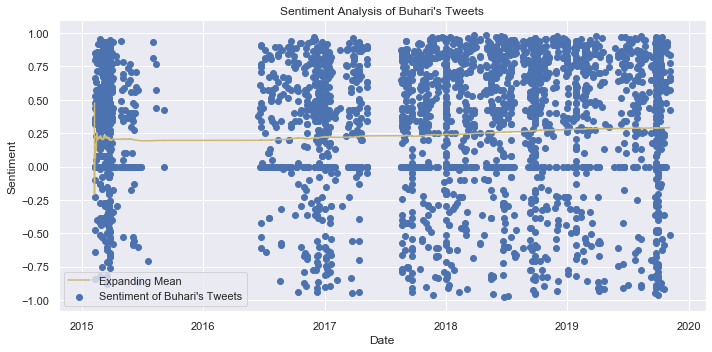

In [38]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.scatter(data.index, data['compound'], label="Sentiment of Buhari's Tweets")
ax.plot(data.index, data['mean_sentiment'], color='y', label='Expanding Mean')
#ax.plot(data.index, data['rolling_sentiment'], color='g', label='Rolling Mean')
ax.set(title="Sentiment Analysis of Buhari's Tweets", xlabel="Date", ylabel="Sentiment")
ax.legend(loc='best')

fig.tight_layout()
plt.show()

#### Comments

* Perhaps it is expected that his interactions should maintain a positive disposition. 
* We have a near constant sentiment level here over the years so it's possible that the same team has handled his Twitter interactions. I wonder if it is possible to affirm this hypothesis. 

# Topic Modelling

In [39]:
# Convert the text column to list for modelling
texts = data.text.values.tolist()

In [40]:
import spacy

def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    """
    This function lemmatizes individual words in the corpus.
    Parameters:
    -----------
    texts - A list of strings. 
    allowed_postags - A list of POS to keep in the output. 
    
    Returns:
    --------
    A list similar to input but with words reduces to their lemmas.
    """
    # Initialized an empty list to hold output
    texts_out = []
    
    # Loop over individual string items in input &
    # lemmatized. Ignores words if POS not in allowed_postags
    for sent in texts:
        doc = nlp(sent)
        
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ["-PRON"]
                                  else "" for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [41]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Keeping only Nouns & Verbs. These are enough to define individual topics
data_lemmatized = lemmatization(texts, allowed_postags=["NOUN", "VERB"])

print(data_lemmatized[:2])

['friend know wait speak postponement election yesterday', 'postponement attempt subvert democracy world see']


In [42]:
# Create document-word matrix required for LDA model. 
# Ignores words not in up to 10 tweets. 

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word',
                            min_df=10,
                            stop_words='english',
                            lowercase=True,
                            token_pattern='[a-zA-Z0-9]{3,}',
                            max_features=5000)

data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [43]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

search_params = {"n_components": [3, 5, 10, 15, 20, 25, 30],
                "learning_decay": [.5, .7, .9]}

lda = LatentDirichletAllocation(max_iter=5,
                               learning_method='online',
                               learning_offset=50.,
                               random_state=69)

model = GridSearchCV(lda, param_grid=search_params)

model.fit(data_vectorized)

c:\users\niniolaadegboyega\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='online',
                                                 learning_offset=50.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=5,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1, random_state=69,
                                                 topic_word_prior=None,
                                                 total_samples=1000000.0,
            

In [45]:
lda_model = model.best_estimator_

print("Best Model's Params: {}".format(model.best_params_))

print("Best likelihood score: {}".format(model.best_score_))

print("Model Perplexity: {}".format(lda_model.perplexity(data_vectorized)))

Best Model's Params: {'learning_decay': 0.9, 'n_components': 3}
Best likelihood score: -46224.32038612968
Model Perplexity: 533.9509763487096


In [46]:
import numpy as np

# Classify the individual tweets into the gridsearched topics
topic = lda_model.fit_transform(data_vectorized)
topic = [x.argmax() for x in topic]

keywords = np.array(vectorizer.get_feature_names())

In [51]:
#Initialize empty list to hold topics & their keywords
topic_keywords = dict()

for i in range(3): 
    # Select top 20 words for each topic
    topic_keywords[i] = list()
    
    for word in lda_model.components_[i].argsort()[:10]:
        topic_keywords[i].append(keywords.take(word))

In [52]:
topic_keywords

{0: ['electricity',
  'federation',
  'flag',
  'investigation',
  'comfort',
  'chibokgirl',
  'loan',
  'commander',
  'railway',
  'announce'],
 1: ['affair',
  'ambassador',
  'text',
  'decision',
  'thingswillchange',
  'crowd',
  'event',
  'distribution',
  'guarantee',
  'acknowledge'],
 2: ['chibokgirl',
  'poll',
  'director',
  'artisan',
  'river',
  'crowd',
  'exercise',
  'video',
  'arrive',
  'mission']}

In [54]:
topic_keys = {0: "Projects / Plans",
              1: "Economy",
              2: "Security"}

In [56]:
# Add topic back to initial dataframe 
data["topics"] = topic
data.topics = data.topics.map(topic_keys)

In [61]:
data[["text", "topics", "retweet_count"]].tail()

,text,topics,retweet_count
created_at,,,
2019-11-04 15:54:45,now a month later we have together with the ...,Security,189
2019-11-04 16:08:30,nigeria will now receive its fair rightful an...,Security,203
2019-11-04 16:10:14,all attempts to amend the law on the distribut...,Security,140
2019-11-04 16:11:39,today this changes for the first time under o...,Security,189
2019-11-04 16:11:56,today marks a new and beneficial relationship ...,Projects / Plans,184


#### Comments

* From inspection, LDA is not doing a very good job despite grid searching for lowest perplexity. 
* Perhaps the focus should not be on finding the lowest possible perplexity. I will investigate this. 
* This means further analysis based on topics cannot be trusted. 

In [62]:
topic_interactions = data.groupby("topics")[["retweet_count", "favourite_count"]].sum()

In [63]:
topic_interactions["engagements"] = topic_interactions.sum(axis=1)

In [64]:
topic_interactions

,retweet_count,favourite_count,engagements
topics,,,
Economy,392053,726751,1118804
Projects / Plans,503925,765465,1269390
Security,512480,1022788,1535268


In [65]:
data.topics.value_counts()

Projects / Plans    1223
Security            1161
Economy              861
Name: topics, dtype: int64

# Word Cloud

In [66]:
import cv2 as cv
from wordcloud import WordCloud 

In [67]:
img = cv.imread("..\\data\\buhari_mask.jpg")

In [68]:
wc = WordCloud(background_color="white", max_words=200, 
              mask=img, stopwords=stop_words,
              contour_width=3, contour_color="green")

text = " ".join(x for x in data.text)

wc.generate(text)

wc.to_file("buhari_overall.png")

In [69]:
def generate_wordcloud(data, mask, background_color="white", contour_color="green", stopwords=stop_words, max_words=200):
    for year in data.year.unique():
        text = " ".join(x for x in data.loc[data.year == year].text)
        
        wc = WordCloud(background_color=background_color, stopwords=stopwords,
                       max_words=max_words, mask=mask, 
                      contour_width=3, contour_color=contour_color)
        wc.generate(text)
        filename = "buhari_" + str(year) + ".jpg"
        wc.to_file(filename)

In [70]:
generate_wordcloud(data, mask=img)

# Notes

* Do more learnings on LDA. 
* Look for other sources of official interactions by Buhari & extend this study. 